In [10]:
import json
import random

plan = "calibrated_high_conf"
uids = 10
queue_data = []
for uid in range(uids):
    queue_data.append(json.load(open(f"../web/baked_queues/{plan}_{uid:0>3}.json")))
print(f"Loaded {len(sum(queue_data, []))} question-assistance pairs")

Loaded 300 question-assistance pairs


In [11]:
import numpy as np
accuracies = [np.mean([q["ai_is_correct"] for q in queue]) for queue in queue_data]
print(f"AI accuracy: {np.mean(accuracies):.2%} +- {np.std(accuracies):.2%}")

AI accuracy: 78.67% +- 4.76%


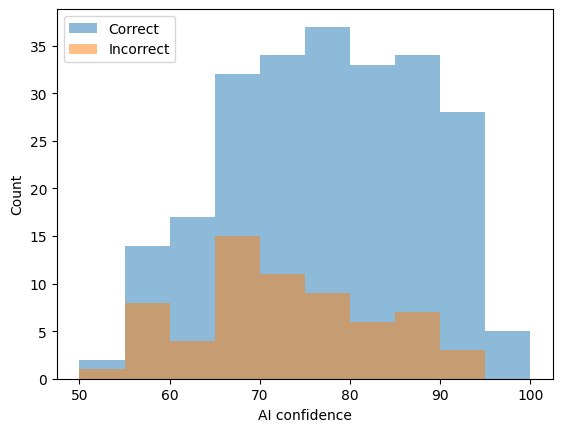

In [3]:
# Plot confidence histogram when AI is correct vs incorrect
import matplotlib.pyplot as plt
import numpy as np

correct_confidences = [float(x['ai_confidence'].strip('%')) for x in queue_data if x['ai_is_correct']]
incorrect_confidences = [float(x['ai_confidence'].strip('%')) for x in queue_data if not x['ai_is_correct']]
plt.hist(correct_confidences, bins=np.arange(50, 101, 5), alpha=0.5, label='Correct')
plt.hist(incorrect_confidences, bins=np.arange(50, 101, 5), alpha=0.5, label='Incorrect')
plt.xlabel('AI confidence')
plt.ylabel('Count')
plt.legend()

Queue ID: 9
AI accuracy: 73.33%


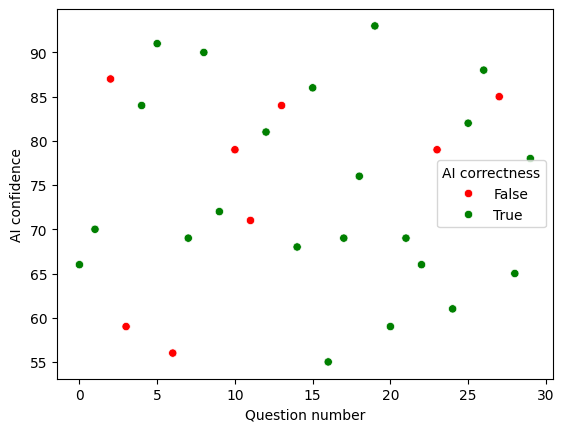

In [4]:
queue_id = random.randint(0, uids - 1)
print(f"Queue ID: {queue_id}")
queue = json.load(open(f"../web/baked_queues/{plan}_{queue_id:0>3}.json"))

import seaborn as sns
ai_confidences = [float(x['ai_confidence'].strip('%')) for x in queue]
ai_correctness = [x['ai_is_correct'] for x in queue]
x = range(len(queue))
sns.scatterplot(x=x, y=ai_confidences, hue=ai_correctness, palette={True: 'green', False: 'red'}, sizes=100)
plt.xlabel('Question number')
plt.ylabel('AI confidence')
plt.legend(title='AI correctness')

accuracy = sum(ai_correctness) / len(ai_correctness)
print(f"AI accuracy: {accuracy:.2%}")